# Redes Neuronales Convolucionales

---

Una arquitectura neuronal de mayor complejidad fue estudiada por **Hubel** y **Weisel** a inicios de 1950, observada en la corteza visual de gatos y monos, se vió que su estructura era diferente de las ya conocidas, que inspiraron a las redes neuronales artificiales (Densas ó completamente conectadas). Sin embargo, no fue hasta 1980 que se dió a conocer por **Kunihiko Fukushima**, como propuesta computacional un algoritmo capaz de imitar el funcionamiento de las neuronas observadas por **Hubel** .

<img border = "0" align = "right" src = "https://www.researchgate.net/profile/Alfredo_Ardila/publication/268926205/figure/download/fig12/AS:392042791358466@1470481693236/Fig-C4-Corteza-visual-primaria-Adaptado-de-Gazzaniga-Ivry-Mangun-2002.png" width="25%">

Podemos entonces desde este punto, definir a las **redes neuronales convolucionales** desde un punto de vista matemático según la operación que internamente realizan, que es la **convolución**. Por mencionar algunas de las aplicaciones de las redes neuronales convolucionales, son las que se enumeran a continuación:

*   Visión por computadora
*   Detección de rostros
*   Detección de cáncer
*   **Detección de dígitos** (http://neuralnetworksanddeeplearning.com/chap1.html)
*   Remasterización de video
*   Procesamiento de imágenes
*   Transferencia de estilo en imágenes
*   Mapas de profundidad (self driving cars)
*   Autómatas celulares (https://distill.pub/2020/growing-ca/)





## ¿Qué es la convolución?
Desde un punto de vista meramente matemático, podemos definir en el espacio de funciones que mapean $\to \mathbb{R}$ del espacio euclidiano, a la convolución como se encuentra a continuación:   
\begin{equation}
  \left ( f*g \right )(t) \doteq \int_{-\infty }^{\infty}f(\tau)g(t-\tau)d\tau  
\end{equation}

<img border = "0" align = "left" src = "https://upload.wikimedia.org/wikipedia/commons/7/79/Convolution3.svg" width = "25%"> donde $f(t)$ y $g(t)$ son funciones que dependen del tiempo y están definidas en un intervalo temporal $t$, esta definición lo que nos sugiere es una multiplicación de la función $f(t)$ evaluada en un instante $\tau$ por la función $g(t)$ reflejada sobre el eje temporal y desfasada hacia atrás en el tiempo un instante $t$ para todos los posibles valores de $\tau$.

Algunas características de la convolución son muy semejantes a las de una función de correlación, por que de cierto modo nos permite hablar de un principio de causalidad entre ambas funciones. Esto desde un punto de vista geométrico en una dimensión, pero como cualquier otro concepto matemático puede ser extendido a más de una dimensión y como no tiene significado físico hablar de más de una dimensión temporal, este concepto se extiende a dimensiones espaciales como lo es el de una imagen. Una imagen es un objeto que desde el punto de vista computacional se encuentra definida por 5 dimensiones, 2 dimensiones espaciales para un arreglo $xy$ además de 3 dimensiones destinadas a la intensidad de los colores primarios RGB (Red, Green, Blue), cuyos valores numéricos van de 0-255. 

### Convolución en 2D

Por simplicidad, en el ejemplo que se trabajará en la sesión (Detección de dígitos) utilizaremos solamente imágenes en blanco y negro o bien en escala de grises, esto es con valores numéricos 0-1. Pero además es una práctica aceptada en general dentro de la comunidad del Deep Learning, ya que nos permite enfocarnos en las características más relevantes de la imagen, como pueden ser los bordes. Por ello es que estudiaremos a la imagen como si estuviése compuesta solo de 3 dimensiones, largo, ancho y su intensidad de cada pixel. <img border = "0" aling = "right" src = "https://camo.githubusercontent.com/3309220c48ab22c9a5dfe7656c3f1639b6b1755d/68747470733a2f2f7777772e64726f70626f782e636f6d2f732f6e3134713930677a386138726278622f32645f636f6e766f6c7574696f6e2e706e673f7261773d31" width = "50%"> La operación de convolución en 2D es similar a la operación del desfase de la función que se llevo acabo para el caso 1D, sin embargo, ahora en vez de tener una función lo que tenemos es un kernel o matriz que es menor al tamaño original de la imagen y cuyo propósito será el de cambiar las propiedades de la imagen (forma, tamaño, color, intensidad, nitidez, definición, etc.) en la figura superior, se ilustra el proceso de la capa convolucional de una CNN. La arquitectura de una CNN típica es la de una pila de capas convolucionales consecutivas seguidas de una función ReLU, después una pooling layer, seguida de otras capas convolucionales y así sucesivamente, para finalmente tener una capa completamente conectada con una función de activación que para el caso de clasificación, será una softmax, con lo que estimaremos las probabilidades de pertenercer a cada una de las clases. A continuación se muestra la función de activación **softmax** de $K$ diferentes clases:

\begin{equation}
  \sigma(\boldsymbol{z})_{i} =\frac{e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}
\end{equation}

Arquitectura típica para la detección de dígitos:

<center>
<img src = "https://miro.medium.com/max/3744/1*CnNorCR4Zdq7pVchdsRGyw.png" width = "70%">
</center>

In [ ]:
from sklearn.datasets import load_sample_image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras 

In [ ]:
plt.rcParams['font.size'] = 24
plt.style.use('seaborn-poster')

In [ ]:
# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print('batch_size, height, width, channels :', images.shape)

batch_size, height, width, channels : (2, 427, 640, 3)


In [ ]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line
print('filter shape :', filters.shape)

filter shape : (7, 7, 3, 2)


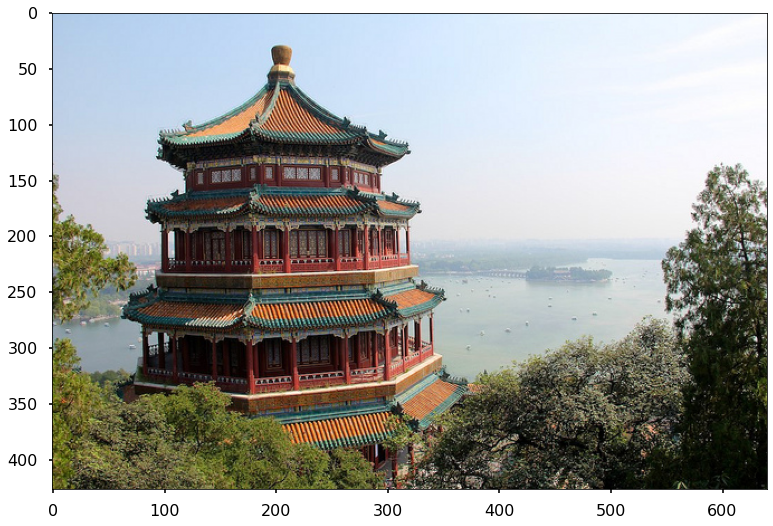

In [ ]:
plt.imshow(china)
plt.show()

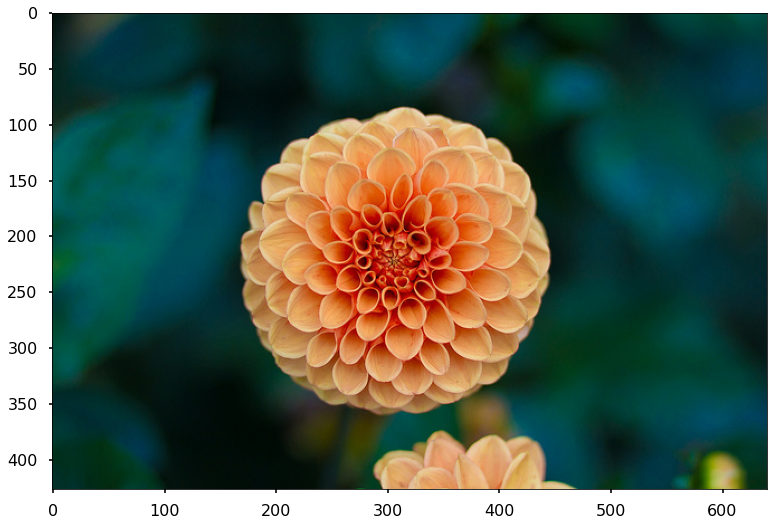

In [ ]:
plt.imshow(flower)
plt.show()

In [ ]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In [ ]:
outputs.shape

TensorShape([2, 427, 640, 2])

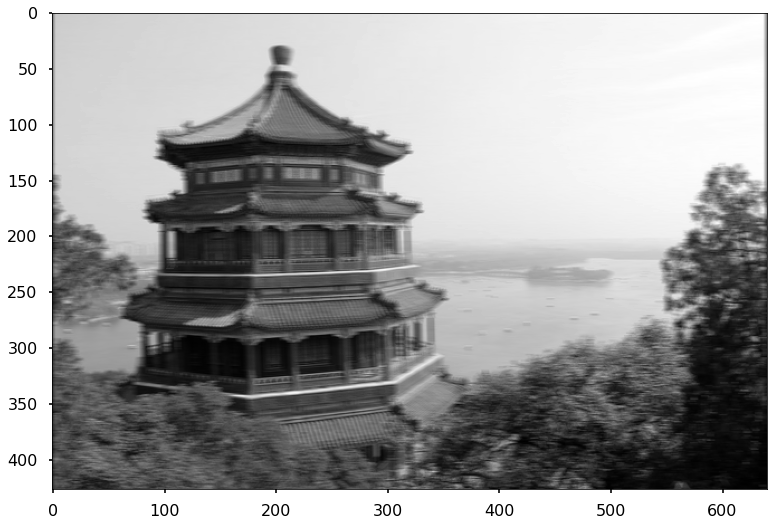

In [ ]:
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

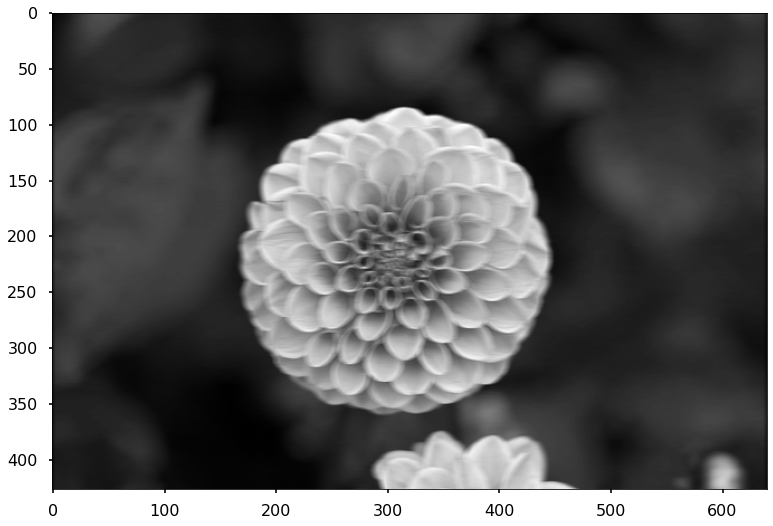

In [ ]:
plt.imshow(outputs[1, :, :, 1], cmap="gray")
plt.show()

In [ ]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [ ]:
#output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3),
#                        padding="VALID")
#output.shape

In [ ]:
#plt.imshow(output[0, :, :, 0], cmap="gray")
#plt.show()

In [ ]:
#plt.imshow(output[1, :, :, 0], cmap="gray")
#plt.show()

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
print("categorical labels :")
print(y_train[0:5])

categorical labels :
[5 0 4 1 9]


In [ ]:
# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)
print("one hot encode labels :")
print(y_train[0:5])

one hot encode labels :
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [ ]:
print("number of training examples :", x_train.shape[0])
print("number of test examples :", x_test.shape[0])

number of training examples : 60000
number of test examples : 10000


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

In [ ]:
flatten = tf.keras.layers.Flatten(dtype = 'float32')

In [ ]:
print("original data shape :")
print(x_train.shape)
print("flattened shape :")
print(flatten(x_train).shape)

original data shape :
(60000, 28, 28)
flattened shape :
(60000, 784)


In [ ]:
W = tf.Variable(tf.zeros([784, 10], tf.float32))
b = tf.Variable(tf.zeros([10], tf.float32))

def foward(x):
    return(tf.matmul(x, W)+b)

def activate(x):
    return(tf.nn.softmax(foward(x)))

def model(x):
    x = flatten(x)
    return(activate(x))

def cross_entropy(y_label, y_pred):
    return(-tf.reduce_sum(y_label*tf.math.log(y_pred+1*np.e**-10)))

cross_entropy(y_train, model(x_train)).numpy()

138127.88

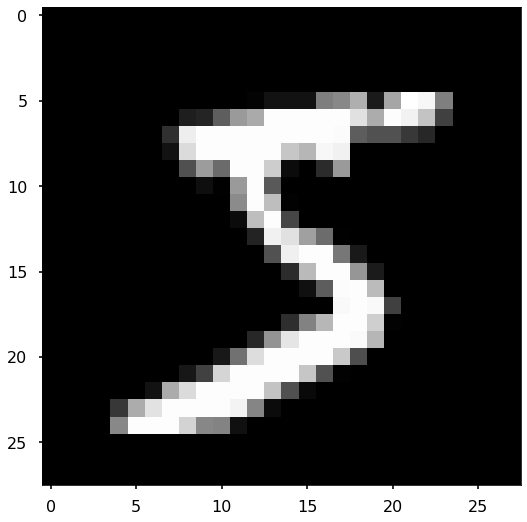

In [ ]:
plt.imshow(x_train[0, :, :], cmap="gray")
plt.show()

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

def train_step(x, y):
    with tf.GradientTape() as tape:
        # compute loss function
        current_loss = cross_entropy(y, model(x))
        grads = tape.gradient(current_loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))
        return(current_loss)
loss_values = []
accuracies = []
epochs = 10

for i in range(epochs):
    j = 0
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch).numpy()
        if j%500 == 0:
            print("epoch", str(i), "batch", str(j), 
                  "loss :", str(current_loss))
    current_loss = cross_entropy(y_train, model(x_train)).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1), tf.argmax(y_train, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch", str(i), "loss", str(current_loss), 
          "accuracy", str(accuracy))

epoch 0 batch 500 loss : 108.93967
epoch 0 batch 1000 loss : 82.770256
end of epoch 0 loss 124474.78 accuracy 0.77751666
epoch 1 batch 500 loss : 75.26548
epoch 1 batch 1000 loss : 71.26442
end of epoch 1 loss 117728.375 accuracy 0.79111665
epoch 2 batch 500 loss : 75.7142
epoch 2 batch 1000 loss : 89.45192
end of epoch 2 loss 104367.15 accuracy 0.8157333
epoch 3 batch 500 loss : 70.6546
epoch 3 batch 1000 loss : 73.49822
end of epoch 3 loss 104044.64 accuracy 0.8178333
epoch 4 batch 500 loss : 84.52945
epoch 4 batch 1000 loss : 89.998055
end of epoch 4 loss 102071.234 accuracy 0.82161665
epoch 5 batch 500 loss : 91.33467
epoch 5 batch 1000 loss : 80.458626
end of epoch 5 loss 97742.68 accuracy 0.82988334
epoch 6 batch 500 loss : 82.749016
epoch 6 batch 1000 loss : 81.95409
end of epoch 6 loss 104029.3 accuracy 0.81801665
epoch 7 batch 500 loss : 73.41619
epoch 7 batch 1000 loss : 88.461945
end of epoch 7 loss 99332.55 accuracy 0.8268167
epoch 8 batch 500 loss : 70.75929
epoch 8 batch 

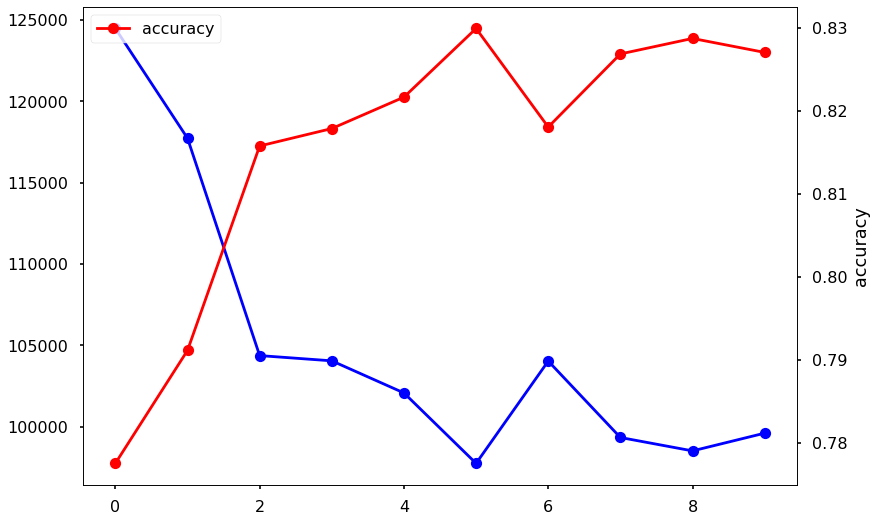

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(range(len(loss_values)), loss_values, 'b-o', label='loss values')
ax2 = ax1.twinx()
ax2.plot(range(len(accuracies)), accuracies, 'r-o', label='accuracy')
plt.xlabel('epoch')
plt.ylabel('cross entropy')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
predict = model(x_train).numpy()

In [ ]:
predict.shape

(60000, 10)

In [ ]:
predict[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(x_train.shape)

(60000, 28, 28)


### Arquitectura de la CNN

```
# (Input) -> [batch_size, 28, 28, 1] >> Apply 16 filters of [3x3]
# (Convolutional layer 1) -> [batch_size, 28, 28, 16]
# (ReLU 1) -> [?, 28, 28, 16]
# (Max pooling 1) -> [?, 14, 14, 16]
# (Convolutional layer 2) -> [?, 14, 14, 32]
# (ReLU 2) -> [?, 14, 14, 32]
# (Max pooling 2) -> [?, 7, 7, 32]
# (Dropout(0.25))
# (fully connected layer 1) -> [?, 7x7x32, 128]
# (ReLU 3) -> [?, 128]
# (Dropout(0.5))
# (fully connected layer 2) -> [?, 128, 10]
# (softmax layer) -> [?, 10]
```



In [ ]:
# Deep Computer Vision Using Convolutional Neural Networks
width = 28
height = 28
flat = width*height
class_output = 10

x_image_train = tf.reshape(x_train, [-1, 28, 28, 1])
x_image_train = tf.cast(x_image_train, 'float32')
x_image_test = tf.reshape(x_test, [-1, 28, 28, 1])
x_image_test = tf.cast(x_image_test, 'float32')

# creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(128)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(128)

W_conv1 = tf.Variable(tf.random.truncated_normal([3, 3, 1, 16], stddev= 0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[16]))

def convolve1(x):
    return(tf.nn.conv2d(x, W_conv1, strides=[1,1,1,1], padding="SAME")+b_conv1)

def h_conv1(x):
    return(tf.nn.relu(convolve1(x)))

def conv1(x):
    return(tf.nn.max_pool(h_conv1(x), ksize=[1,2,2,1], strides=[1,2,2,1],
                          padding="SAME"))
W_conv2 = tf.Variable(tf.random.truncated_normal([3,3,16,32], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[32]))

def convolve2(x):
    return(tf.nn.conv2d(conv1(x), W_conv2, strides=[1,1,1,1], padding="SAME")
    +b_conv2)

def h_conv2(x):
    return(tf.nn.relu(convolve2(x)))

def conv2(x):
    return(tf.nn.max_pool(h_conv2(x), ksize=[1,2,2,1], strides=[1,2,2,1],
                          padding="SAME"))
    
def layer2_matrix(x):
    return(tf.reshape(conv2(x), [-1, 7*7*32]))

def layer_drop1(x):
    return(tf.nn.dropout(layer2_matrix(x), 0.25))
  
W_fc1 = tf.Variable(tf.random.truncated_normal([7*7*32, 128], seed=2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[128]))

def fc1(x):
    return(tf.matmul(layer_drop1(x), W_fc1)+b_fc1)

def h_fc1(x):
    return(tf.nn.relu(fc1(x)))

keep_prob = 0.5

def layer_drop2(x):
    return(tf.nn.dropout(h_fc1(x), keep_prob))

# This last layer it will have 10 characteristics
W_fc2 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1,
                                               seed=2))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))

def fc(x):
    return(tf.matmul(layer_drop2(x), W_fc2)+b_fc2)

def yCNN(x):
    return(tf.nn.softmax(fc(x)))

optimizer = tf.keras.optimizers.Adam(1*np.e**-4)
variables = [W_conv1, b_conv1, W_conv2, b_conv2, W_fc1, b_fc1, 
             W_fc2, b_fc2]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy(y, yCNN(x))
        grads = tape.gradient(current_loss, variables)
        optimizer.apply_gradients(zip(grads, variables))
        return(current_loss.numpy())

loss_values = []
accuracies = []
epochs = 1

for i in range(epochs):
    j = 0
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if(j%250 == 0):
            correct_prediction = tf.equal(tf.argmax(yCNN(x_image_train), axis=1), 
                                          tf.argmax(y_train, axis=1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch", str(i), "batch", str(j), "loss :", str(current_loss), 
                  "accuracy", str(accuracy))
    current_loss = cross_entropy(y_train, yCNN(x_image_train))
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(yCNN(x_image_train), axis=1), 
                                  tf.argmax(y_train, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch", str(i), "loss", str(current_loss), "accuracy", 
          str(accuracy))

epoch 0 batch 250 loss : 69.20111 accuracy 0.8466167
end of epoch 0 loss tf.Tensor(23342.52, shape=(), dtype=float32) accuracy 0.87913334


In [ ]:
def prepare_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', 
                                     input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return(model)

model = prepare_model()
model.fit(x_image_train, y_train, batch_size=128, epochs=1, verbose=1)

469/469 [==============================] - 182s 389ms/step - loss: 0.2356 - accuracy: 0.9284
